In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython import display


def use_svg_display():
    display.set_matplotlib_formats('svg')

In [100]:
# Read JRTs
file = "JRTs_u0.5_zipf2"
with open(file, "r") as f:
    obta_jrts = f.readline()
    nlip_jrts = f.readline()
    wf_jrts = f.readline()
    ocwf_jrts = f.readline()
    ocwf_acc_jrts = f.readline()

obta_jrts = [int(i) for i in obta_jrts.split(" ")[:-1]]
nlip_jrts = [int(i) for i in nlip_jrts.split(" ")[:-1]]
wf_jrts = [int(i) for i in wf_jrts.split(" ")[:-1]]
ocwf_jrts = [int(i) for i in ocwf_jrts.split(" ")[:-1]]
ocwf_acc_jrts = [int(i) for i in ocwf_acc_jrts.split(" ")[:-1]]

print(obta_jrts)

zipf_para = 2
utilization = 50

global_min = min(min(obta_jrts), min(nlip_jrts), min(wf_jrts), min(ocwf_jrts), min(ocwf_acc_jrts))
global_max = max(max(obta_jrts), max(nlip_jrts), max(wf_jrts), max(ocwf_jrts), max(ocwf_acc_jrts))
print("global min:", global_min, ", global max:", global_max)

[18, 24, 8, 10, 13, 10, 14, 28, 47, 60, 5, 59, 98, 79, 107, 1, 1, 113, 120, 126, 15, 10, 165, 171, 159, 162, 158, 177, 1, 3, 1, 51, 225, 200, 1, 16, 17, 1, 1, 4, 6, 445, 380, 455, 400, 1, 485, 11, 441, 452, 451, 472, 1, 474, 525, 550, 558, 669, 706, 705, 907, 934, 1002, 947, 961, 989, 1043, 1064, 1283, 1350, 1568, 1658, 1665, 1705, 1718, 1800, 1734, 1800, 1805, 1912, 1898, 1962, 1957, 2085, 1982, 1988, 2102, 2158, 2050, 2056, 2061, 2094, 2088, 2074, 2116, 2250, 2140, 2168, 2169, 2189, 2231, 2349, 2322, 2405, 2422, 2436, 2591, 2533, 2566, 2633, 2618, 2639, 2642, 2666, 2740, 2855, 2802, 3224, 3649, 3962, 4067, 4226, 4226, 4246, 4243, 4295, 4306, 4321, 4316, 4330, 4331, 4332, 4610, 4817, 4804, 4803, 4810, 4834, 4839, 4844, 4875, 4962, 5011, 5011, 5011, 5053, 5171, 5187, 5197, 5198, 5256, 5369, 5370, 5370, 5388, 5521, 5636, 5707, 5681, 5706, 5691, 5815, 5757, 5934, 5950, 5984, 6078, 6074, 6068, 6066, 6194, 6185, 6273, 6331, 6309, 6319, 6338, 6320, 6315, 6322, 6339, 6383, 6403, 6349, 6471, 

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_54483/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


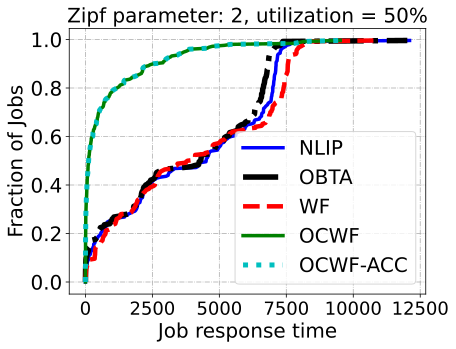

In [101]:
def plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts):
    """
    Plot CDF of average JRTs.
    """
    use_svg_display()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.grid(linestyle='-.')

    ax1.plot(np.sort(nlip_jrts), np.linspace(0, 1, len(nlip_jrts), endpoint=False), color='b', ls='-', lw=3.5)
    ax1.plot(np.sort(obta_jrts), np.linspace(0, 1, len(obta_jrts), endpoint=False), color='k', ls='-.', lw=5.5)
    ax1.plot(np.sort(wf_jrts), np.linspace(0, 1, len(wf_jrts), endpoint=False), color='r', ls='--', lw=4.5)
    ax1.plot(np.sort(ocwf_jrts), np.linspace(0, 1, len(ocwf_jrts), endpoint=False), color='g', ls='-', lw=3.5)
    ax1.plot(np.sort(ocwf_acc_jrts), np.linspace(0, 1, len(ocwf_acc_jrts), endpoint=False), color='c', ls=':', lw=5)
    

    ax1.legend(['NLIP', 'OBTA', 'WF', 'OCWF', 'OCWF-ACC'], fontsize=20)
    ax1.set_ylabel('Fraction of Jobs', fontsize=20)
    ax1.set_xlabel('Job response time', fontsize=20)

    plt.title("Zipf parameter: {}, utilization = {}%".format(zipf_para, utilization), fontsize=20)
    plt.locator_params(axis='x', nbins=6)
    plt.xticks(fontsize=20-2)
    plt.yticks(fontsize=20)

    plt.savefig('zipf2_u50.eps', bbox_inches='tight')
    plt.show()

    
plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts)

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_54483/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


[0.02882019 0.02980098 0.03357476 0.03420401] [0.06315374 0.06304527 0.07070468 0.05437495] [0.00029887 0.00029274 0.00028553 0.00034388] [2.76621463 2.69212525 2.74460929 3.27075214] [1.94134725 1.9478779  1.8863817  2.01371663]


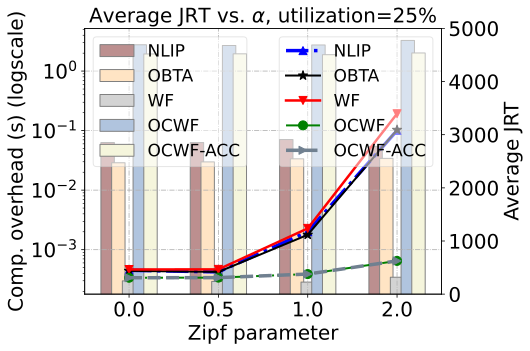

In [140]:
def plot_curve_and_bar(file, fontsize=20):
    """
    THE LHS is the curve figure of avergae JRT. The RHS is the bar figure of computation overhead.
    """
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')

    x = np.array([1, 3, 5, 7])
    x_label = np.array([0, 0.5, 1, 2])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    OCWF = data[3]
    OCWF_ACC = data[4]
    
    OBTA_time = data[5]
    NLIP_time = data[6]
    WF_time = data[7]
    OCWF_time = data[8]
    OCWF_ACC_time = data[9]
    print(OBTA_time, NLIP_time, WF_time, OCWF_time, OCWF_ACC_time)

    width = 0.3

    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(r"Average JRT vs. $\alpha$, utilization=25%", fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.bar(x - 1.6 * width, NLIP_time, width, label='NLIP', edgecolor='gray', color='rosybrown')
    ax1.bar(x - 0.8 * width, OBTA_time, width, label='OBTA', edgecolor='gray', color='bisque')
    ax1.bar(x, WF_time, width, label='WF', edgecolor='gray', color='lightgrey')
    ax1.bar(x + 0.8 * width, OCWF_time, width, label='OCWF', edgecolor='gray', color='lightsteelblue')
    ax1.bar(x + 1.6 * width, OCWF_ACC_time, width, label='OCWF-ACC', edgecolor='gray', color='beige')
    ax1.set_xlabel('Zipf parameter', fontsize=fontsize)
    y = [-4, -3, -2, -1, 0, 1]
    y_label = [r"$10^{-4}$", r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^{1}$"]
    ax1.set_yticks(y, labels=y_label, fontsize=fontsize)
    plt.yscale("log")
    ax1.set_xticks(x, labels=x_label, fontsize=fontsize)
    
    ax2 = ax1.twinx()
    ax2.plot(x, NLIP, color='b', ls='-.', linewidth=3.5, marker='^', ms=8, label='NLIP')
    ax2.plot(x, OBTA, color='k', ls='-', linewidth=2, marker='*', ms=10, label='OBTA')
    ax2.plot(x, WF, color='r', ls='-', linewidth=2.5, marker='v', ms=8, label='WF')
    ax2.plot(x, OCWF, color='g', ls='-.', linewidth=2, marker='o', ms=9, label='OCWF')
    ax2.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=3.5, marker='>', ms=8, label='OCWF-ACC')
    ax1.set_ylabel('Comp. overhead (s) (logscale)', fontsize=fontsize)
    ax2.set_ylabel('Average JRT', fontsize=fontsize)
    ax2.set_xlabel('Zipf parameter', fontsize=fontsize)
    ax2.set_xticks(x, labels=x_label, fontsize=fontsize)
    plt.ylim([0, 5000])
    
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper left', fancybox=True, framealpha=0.5)
    ax2.legend(fontsize=fontsize-3, loc='upper right', fancybox=True, framealpha=0.5)
    
    plt.savefig("u25.pdf", bbox_inches='tight')
    plt.show()

    
plot_curve_and_bar("res_u0.25")

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_54483/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


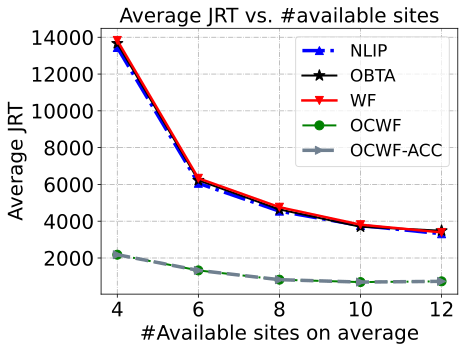

In [121]:
def plot_AS_num(file, fontsize=20):
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')

    x = np.array([1, 3, 5, 7, 9])
    x_label = np.array([4, 6, 8, 10, 12])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    OCWF = data[3]
    OCWF_ACC = data[4]

    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(r"Average JRT vs. #available sites", fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.plot(x, NLIP, color='b', ls='-.', linewidth=3.5, marker='^', ms=8, label='NLIP')
    ax1.plot(x, OBTA, color='k', ls='-', linewidth=2, marker='*', ms=12, label='OBTA')
    ax1.plot(x, WF, color='r', ls='-', linewidth=2.5, marker='v', ms=8, label='WF')
    ax1.plot(x, OCWF, color='g', ls='-.', linewidth=2, marker='o', ms=9, label='OCWF')
    ax1.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=3.5, marker='>', ms=8, label='OCWF-ACC')
    ax1.set_ylabel('Average JRT', fontsize=fontsize)
    ax1.set_xlabel("#Available sites on average", fontsize=fontsize)
    ax1.set_xticks(x, labels=x_label, fontsize=fontsize)
    
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper right', fancybox=True, framealpha=0.75)
    
    plt.savefig("AS_num.pdf", bbox_inches='tight')
    plt.show()

    
plot_AS_num("res_AS_num")

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_54483/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


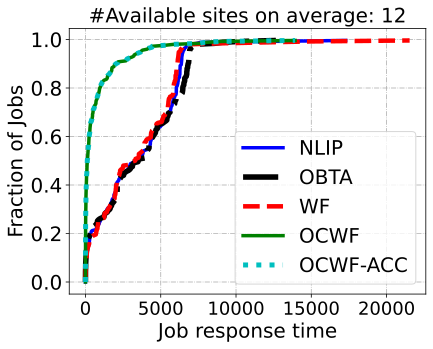

In [111]:
# Draw JRTs with different available sites
file = "AS_num_10_14"
with open(file, "r") as f:
    obta_jrts = f.readline()
    nlip_jrts = f.readline()
    wf_jrts = f.readline()
    ocwf_jrts = f.readline()
    ocwf_acc_jrts = f.readline()

obta_jrts = [int(i) for i in obta_jrts.split(" ")[:-1]]
nlip_jrts = [int(i) for i in nlip_jrts.split(" ")[:-1]]
wf_jrts = [int(i) for i in wf_jrts.split(" ")[:-1]]
ocwf_jrts = [int(i) for i in ocwf_jrts.split(" ")[:-1]]
ocwf_acc_jrts = [int(i) for i in ocwf_acc_jrts.split(" ")[:-1]]

def plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts):
    """
    Plot CDF of average JRTs.
    """
    use_svg_display()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.grid(linestyle='-.')

    ax1.plot(np.sort(nlip_jrts), np.linspace(0, 1, len(nlip_jrts), endpoint=False), color='b', ls='-', lw=3.5)
    ax1.plot(np.sort(obta_jrts), np.linspace(0, 1, len(obta_jrts), endpoint=False), color='k', ls='-.', lw=5.5)
    ax1.plot(np.sort(wf_jrts), np.linspace(0, 1, len(wf_jrts), endpoint=False), color='r', ls='--', lw=4.5)
    ax1.plot(np.sort(ocwf_jrts), np.linspace(0, 1, len(ocwf_jrts), endpoint=False), color='g', ls='-', lw=3.5)
    ax1.plot(np.sort(ocwf_acc_jrts), np.linspace(0, 1, len(ocwf_acc_jrts), endpoint=False), color='c', ls=':', lw=5)
    

    ax1.legend(['NLIP', 'OBTA', 'WF', 'OCWF', 'OCWF-ACC'], fontsize=20)
    ax1.set_ylabel('Fraction of Jobs', fontsize=20)
    ax1.set_xlabel('Job response time', fontsize=20)

    plt.title("#Available sites on average: {}".format(12), fontsize=20)
    plt.locator_params(axis='x', nbins=7)
    plt.xticks(fontsize=20-2)
    plt.yticks(fontsize=20)

    plt.savefig(file + '.pdf', bbox_inches='tight')
    plt.show()

    
plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts)

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_54483/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


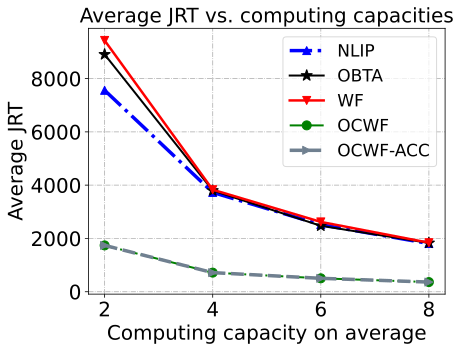

In [116]:
def plot_cap(file, fontsize=20):
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')

    x = np.array([1, 3, 5, 7])
    x_label = np.array([2, 4, 6, 8])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    OCWF = data[3]
    OCWF_ACC = data[4]

    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(r"Average JRT vs. computing capacities", fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.plot(x, NLIP, color='b', ls='-.', linewidth=3.5, marker='^', ms=8, label='NLIP')
    ax1.plot(x, OBTA, color='k', ls='-', linewidth=2, marker='*', ms=12, label='OBTA')
    ax1.plot(x, WF, color='r', ls='-', linewidth=2.5, marker='v', ms=8, label='WF')
    ax1.plot(x, OCWF, color='g', ls='-.', linewidth=2, marker='o', ms=9, label='OCWF')
    ax1.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=3.5, marker='>', ms=8, label='OCWF-ACC')
    ax1.set_ylabel('Average JRT', fontsize=fontsize)
    ax1.set_xlabel("Computing capacity on average", fontsize=fontsize)
    ax1.set_xticks(x, labels=x_label, fontsize=fontsize)
    
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper right', fancybox=True, framealpha=0.75)
    
    plt.savefig("cap.pdf", bbox_inches='tight')
    plt.show()

    
plot_cap("res_cap")

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_54483/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


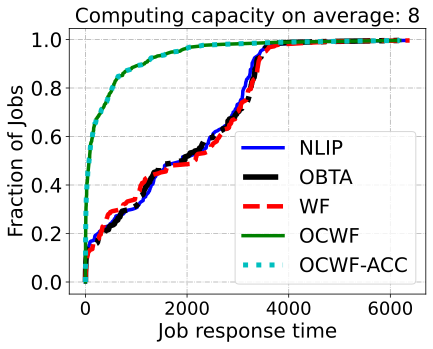

In [120]:
# Draw JRTs with different computing capacties
file = "MU_6_10"
with open(file, "r") as f:
    obta_jrts = f.readline()
    nlip_jrts = f.readline()
    wf_jrts = f.readline()
    ocwf_jrts = f.readline()
    ocwf_acc_jrts = f.readline()

obta_jrts = [int(i) for i in obta_jrts.split(" ")[:-1]]
nlip_jrts = [int(i) for i in nlip_jrts.split(" ")[:-1]]
wf_jrts = [int(i) for i in wf_jrts.split(" ")[:-1]]
ocwf_jrts = [int(i) for i in ocwf_jrts.split(" ")[:-1]]
ocwf_acc_jrts = [int(i) for i in ocwf_acc_jrts.split(" ")[:-1]]

def plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts):
    """
    Plot CDF of average JRTs.
    """
    use_svg_display()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.grid(linestyle='-.')

    ax1.plot(np.sort(nlip_jrts), np.linspace(0, 1, len(nlip_jrts), endpoint=False), color='b', ls='-', lw=3.5)
    ax1.plot(np.sort(obta_jrts), np.linspace(0, 1, len(obta_jrts), endpoint=False), color='k', ls='-.', lw=5.5)
    ax1.plot(np.sort(wf_jrts), np.linspace(0, 1, len(wf_jrts), endpoint=False), color='r', ls='--', lw=4.5)
    ax1.plot(np.sort(ocwf_jrts), np.linspace(0, 1, len(ocwf_jrts), endpoint=False), color='g', ls='-', lw=3.5)
    ax1.plot(np.sort(ocwf_acc_jrts), np.linspace(0, 1, len(ocwf_acc_jrts), endpoint=False), color='c', ls=':', lw=5)
    

    ax1.legend(['NLIP', 'OBTA', 'WF', 'OCWF', 'OCWF-ACC'], fontsize=20)
    ax1.set_ylabel('Fraction of Jobs', fontsize=20)
    ax1.set_xlabel('Job response time', fontsize=20)

    plt.title("Computing capacity on average: {}".format(8), fontsize=20)
    plt.locator_params(axis='x', nbins=7)
    plt.xticks(fontsize=20-2)
    plt.yticks(fontsize=20)

    plt.savefig(file + '.pdf', bbox_inches='tight')
    plt.show()

    
plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts)

In [144]:
OBTA_acc = 0

data = np.loadtxt("res_u0.25", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OBTA_acc += np.average(OBTA_time / NLIP_time)

data = np.loadtxt("res_u0.5", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OBTA_acc += np.average(OBTA_time / NLIP_time)

data = np.loadtxt("res_u0.75", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OBTA_acc += np.average(OBTA_time / NLIP_time)

print(OBTA_acc / 3)

0.5065594558549168


In [145]:
WF_acc = 0

data = np.loadtxt("res_u0.25", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
WF_acc += np.average(WF_time / OBTA_time)

data = np.loadtxt("res_u0.5", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
WF_acc += np.average(WF_time / OBTA_time)

data = np.loadtxt("res_u0.75", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
WF_acc += np.average(WF_time / OBTA_time)

print(WF_acc / 3)

0.01057671379239526


In [146]:
OCWF_acc = 0

data = np.loadtxt("res_u0.25", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OCWF_acc += np.average(OCWF_ACC_time / OCWF_time)

data = np.loadtxt("res_u0.5", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OCWF_acc += np.average(OCWF_ACC_time / OCWF_time)

data = np.loadtxt("res_u0.75", delimiter=' ')
OBTA_time = data[5]
NLIP_time = data[6]
WF_time = data[7]
OCWF_time = data[8]
OCWF_ACC_time = data[9]
OCWF_acc += np.average(OCWF_ACC_time / OCWF_time)

print(OCWF_acc / 3)

0.6308408974027575
